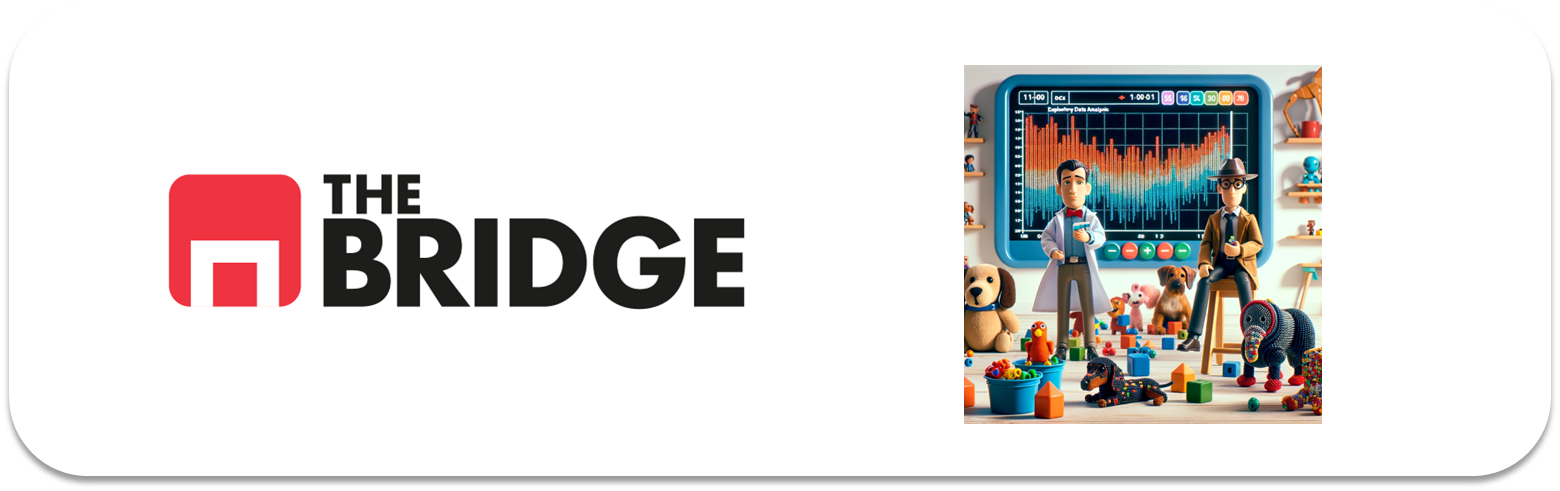

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [2]:
# Cargar el dataset del Titanic
file_path = "./data/titanic.csv"
titanic_df = pd.read_csv(file_path)

# Inspeccionar las primeras filas para confirmar que se cargó correctamente
print("Primeras filas del dataset del Titanic:")
print(titanic_df.head())

# Mostrar las columnas disponibles en el dataset
print("\nColumnas disponibles:")
print(titanic_df.columns)


Primeras filas del dataset del Titanic:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Columnas disponibles:
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive',

### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [3]:
# Eliminar las columnas "deck", "survived", "pclass" y "embarked" del DataFrame
titanic_df = titanic_df.drop(columns=["deck", "survived", "pclass", "embarked"])

# Mostrar las primeras filas del DataFrame resultante para confirmar los cambios
print("\nDataset después de eliminar las columnas innecesarias:")
print(titanic_df.head())

# Mostrar las columnas restantes para verificar
print("\nColumnas restantes:")
print(titanic_df.columns)



Dataset después de eliminar las columnas innecesarias:
      sex   age  sibsp  parch     fare  class    who  adult_male  embark_town  \
0    male  22.0      1      0   7.2500  Third    man        True  Southampton   
1  female  38.0      1      0  71.2833  First  woman       False    Cherbourg   
2  female  26.0      0      0   7.9250  Third  woman       False  Southampton   
3  female  35.0      1      0  53.1000  First  woman       False  Southampton   
4    male  35.0      0      0   8.0500  Third    man        True  Southampton   

  alive  alone  
0    no  False  
1   yes  False  
2   yes   True  
3   yes  False  
4    no   True  

Columnas restantes:
Index(['sex', 'age', 'sibsp', 'parch', 'fare', 'class', 'who', 'adult_male',
       'embark_town', 'alive', 'alone'],
      dtype='object')


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [4]:
# Crear la nueva columna "family_members" sumando "parch" y "sibsp"
titanic_df['family_members'] = titanic_df['parch'] + titanic_df['sibsp']

# Eliminar las columnas "parch" y "sibsp"
titanic_df = titanic_df.drop(columns=['parch', 'sibsp'])

# Mostrar las primeras filas para confirmar los cambios
print("\nDataset después de agregar 'family_members' y eliminar 'parch' y 'sibsp':")
print(titanic_df.head())

# Verificar las columnas restantes
print("\nColumnas restantes:")
print(titanic_df.columns)



Dataset después de agregar 'family_members' y eliminar 'parch' y 'sibsp':
      sex   age     fare  class    who  adult_male  embark_town alive  alone  \
0    male  22.0   7.2500  Third    man        True  Southampton    no  False   
1  female  38.0  71.2833  First  woman       False    Cherbourg   yes  False   
2  female  26.0   7.9250  Third  woman       False  Southampton   yes   True   
3  female  35.0  53.1000  First  woman       False  Southampton   yes  False   
4    male  35.0   8.0500  Third    man        True  Southampton    no   True   

   family_members  
0               1  
1               1  
2               0  
3               1  
4               0  

Columnas restantes:
Index(['sex', 'age', 'fare', 'class', 'who', 'adult_male', 'embark_town',
       'alive', 'alone', 'family_members'],
      dtype='object')


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [5]:
# Calcular la moda de la columna "embark_town"
mode_embark_town = titanic_df['embark_town'].mode()[0]

# Rellenar los valores nulos con la moda
titanic_df['embark_town'].fillna(mode_embark_town, inplace=True)

# Confirmar que ya no hay valores nulos en "embark_town"
print("\nValores nulos en 'embark_town' después de la imputación:")
print(titanic_df['embark_town'].isnull().sum())



Valores nulos en 'embark_town' después de la imputación:
0


C:\Users\javie\AppData\Local\Temp\ipykernel_11316\3250983889.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['embark_town'].fillna(mode_embark_town, inplace=True)


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [6]:
# Calcular la media de "age" para cada grupo en "who"
age_means = titanic_df.groupby('who')['age'].mean()

# Imputar los valores nulos en "age" utilizando la media correspondiente al grupo en "who"
titanic_df['age'] = titanic_df.apply(
    lambda row: age_means[row['who']] if pd.isnull(row['age']) else row['age'], axis=1
)

# Confirmar que no haya valores nulos en "age"
print("\nValores nulos en 'age' después de la imputación:")
print(titanic_df['age'].isnull().sum())



Valores nulos en 'age' después de la imputación:
0


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

In [7]:
# Contar la cantidad de hombres, mujeres y niños que sobrevivieron (en términos absolutos y relativos)
absolute_survival = titanic_df.groupby(['who', 'alive'])['alive'].count().unstack()
relative_survival = absolute_survival.div(absolute_survival.sum(axis=1), axis=0) * 100

print("Supervivencia en términos absolutos:")
print(absolute_survival)

print("\nSupervivencia en términos relativos (%):")
print(relative_survival)


Supervivencia en términos absolutos:
alive   no  yes
who            
child   34   49
man    449   88
woman   66  205

Supervivencia en términos relativos (%):
alive         no        yes
who                        
child  40.963855  59.036145
man    83.612663  16.387337
woman  24.354244  75.645756


In [8]:
from scipy.stats import chi2_contingency

# Tablas de contingencia para sexo y supervivencia
sex_survival_table = pd.crosstab(titanic_df['sex'], titanic_df['alive'])
who_survival_table = pd.crosstab(titanic_df['who'], titanic_df['alive'])

# Prueba de chi-cuadrado para sexo
chi2_sex, p_sex, _, _ = chi2_contingency(sex_survival_table)
print(f"\nChi-cuadrado (sexo): {chi2_sex}, p-value: {p_sex}")

# Prueba de chi-cuadrado para 'who' (adulto vs niño)
chi2_who, p_who, _, _ = chi2_contingency(who_survival_table)
print(f"Chi-cuadrado (who): {chi2_who}, p-value: {p_who}")



Chi-cuadrado (sexo): 260.71702016732104, p-value: 1.1973570627755645e-58
Chi-cuadrado (who): 283.923050324233, p-value: 2.2227620817798914e-62


In [9]:
# Cantidad de sobrevivientes por clase
absolute_class = titanic_df.groupby(['class', 'alive'])['alive'].count().unstack()
relative_class = absolute_class.div(absolute_class.sum(axis=1), axis=0) * 100

print("\nSupervivencia por clase (absoluto):")
print(absolute_class)

print("\nSupervivencia por clase (relativo %):")
print(relative_class)



Supervivencia por clase (absoluto):
alive    no  yes
class           
First    80  136
Second   97   87
Third   372  119

Supervivencia por clase (relativo %):
alive          no        yes
class                       
First   37.037037  62.962963
Second  52.717391  47.282609
Third   75.763747  24.236253


In [10]:
# Tablas de contingencia para clase y supervivencia
class_survival_table = pd.crosstab(titanic_df['class'], titanic_df['alive'])

# Prueba de chi-cuadrado
chi2_class, p_class, _, _ = chi2_contingency(class_survival_table)
print(f"\nChi-cuadrado (clase): {chi2_class}, p-value: {p_class}")



Chi-cuadrado (clase): 102.88898875696056, p-value: 4.549251711298793e-23


In [11]:
# Cantidad de sobrevivientes por ciudad de embarque
absolute_city = titanic_df.groupby(['embark_town', 'alive'])['alive'].count().unstack()
relative_city = absolute_city.div(absolute_city.sum(axis=1), axis=0) * 100

print("\nSupervivencia por ciudad de embarque (absoluto):")
print(absolute_city)

print("\nSupervivencia por ciudad de embarque (relativo %):")
print(relative_city)



Supervivencia por ciudad de embarque (absoluto):
alive         no  yes
embark_town          
Cherbourg     75   93
Queenstown    47   30
Southampton  427  219

Supervivencia por ciudad de embarque (relativo %):
alive               no        yes
embark_town                      
Cherbourg    44.642857  55.357143
Queenstown   61.038961  38.961039
Southampton  66.099071  33.900929


In [12]:
# Tablas de contingencia para ciudad de embarque y supervivencia
city_survival_table = pd.crosstab(titanic_df['embark_town'], titanic_df['alive'])

# Prueba de chi-cuadrado
chi2_city, p_city, _, _ = chi2_contingency(city_survival_table)
print(f"\nChi-cuadrado (ciudad de embarque): {chi2_city}, p-value: {p_city}")



Chi-cuadrado (ciudad de embarque): 25.964452881874784, p-value: 2.3008626481449577e-06


C:\Users\javie\AppData\Local\Temp\ipykernel_11316\2897341059.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=titanic_df, x='alive', y='fare', palette='pastel')


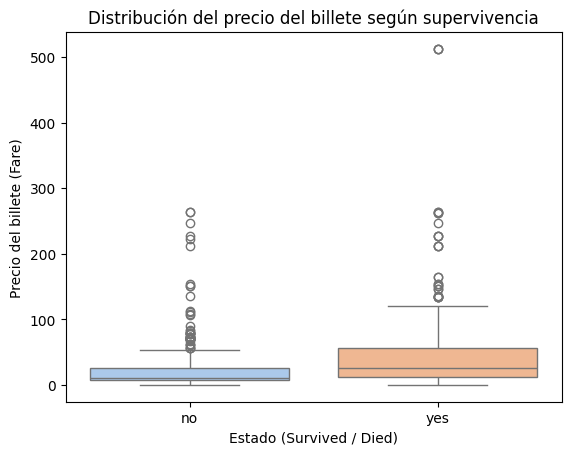

In [13]:
# Boxplot del precio del billete según supervivencia
sns.boxplot(data=titanic_df, x='alive', y='fare', palette='pastel')
plt.title("Distribución del precio del billete según supervivencia")
plt.xlabel("Estado (Survived / Died)")
plt.ylabel("Precio del billete (Fare)")
plt.show()


In [14]:
from scipy.stats import ttest_ind

# Comparar el precio del billete entre sobrevivientes y fallecidos
survived_fare = titanic_df[titanic_df['alive'] == 'yes']['fare']
died_fare = titanic_df[titanic_df['alive'] == 'no']['fare']

t_stat, p_value = ttest_ind(survived_fare, died_fare, nan_policy='omit')
print(f"T-test para precio del billete: t-stat = {t_stat}, p-value = {p_value}")


T-test para precio del billete: t-stat = 7.939191660871055, p-value = 6.120189341924198e-15


In [15]:
# Pasajeros con billete gratuito
no_fare_passengers = titanic_df[titanic_df['fare'] == 0]
print("\nPasajeros que no pagaron el billete:")
print(no_fare_passengers)

# Pasajero que pagó más
highest_fare_passenger = titanic_df[titanic_df['fare'] == titanic_df['fare'].max()]
print("\nPasajero que pagó el billete más caro:")
print(highest_fare_passenger)



Pasajeros que no pagaron el billete:
      sex        age  fare   class  who  adult_male  embark_town alive  alone  \
179  male  36.000000   0.0   Third  man        True  Southampton    no   True   
263  male  40.000000   0.0   First  man        True  Southampton    no   True   
271  male  25.000000   0.0   Third  man        True  Southampton   yes   True   
277  male  33.173123   0.0  Second  man        True  Southampton    no   True   
302  male  19.000000   0.0   Third  man        True  Southampton    no   True   
413  male  33.173123   0.0  Second  man        True  Southampton    no   True   
466  male  33.173123   0.0  Second  man        True  Southampton    no   True   
481  male  33.173123   0.0  Second  man        True  Southampton    no   True   
597  male  49.000000   0.0   Third  man        True  Southampton    no   True   
633  male  33.173123   0.0   First  man        True  Southampton    no   True   
674  male  33.173123   0.0  Second  man        True  Southampton    no 

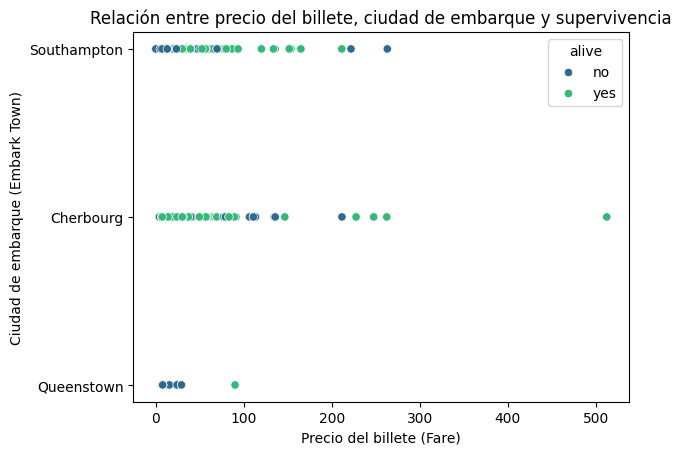

In [16]:
# Gráfico de dispersión entre precio del billete y supervivencia
sns.scatterplot(data=titanic_df, x='fare', y='embark_town', hue='alive', palette='viridis')
plt.title("Relación entre precio del billete, ciudad de embarque y supervivencia")
plt.xlabel("Precio del billete (Fare)")
plt.ylabel("Ciudad de embarque (Embark Town)")
plt.show()


In [17]:
# Gráfico de barras agrupado por clase y rango de edad
titanic_df['age_group'] = pd.cut(titanic_df['age'], bins=[0, 12, 18, 60, 100], labels=['Child', 'Teen', 'Adult', 'Senior'])

# Agrupación por clase y edad
class_age_survival = titanic_df.groupby(['class', 'age_group', 'alive'])['alive'].count().unstack()

print("\nSupervivencia por clase y rango de edad:")
print(class_age_survival)



Supervivencia por clase y rango de edad:
alive              no  yes
class  age_group          
First  Child        1    3
       Teen         1   11
       Adult       67  119
       Senior      11    3
Second Child        0   17
       Teen         6    6
       Adult       89   63
       Senior       2    1
Third  Child       28   20
       Teen        33   13
       Adult      307   85
       Senior       4    1


C:\Users\javie\AppData\Local\Temp\ipykernel_11316\3348567591.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  class_age_survival = titanic_df.groupby(['class', 'age_group', 'alive'])['alive'].count().unstack()


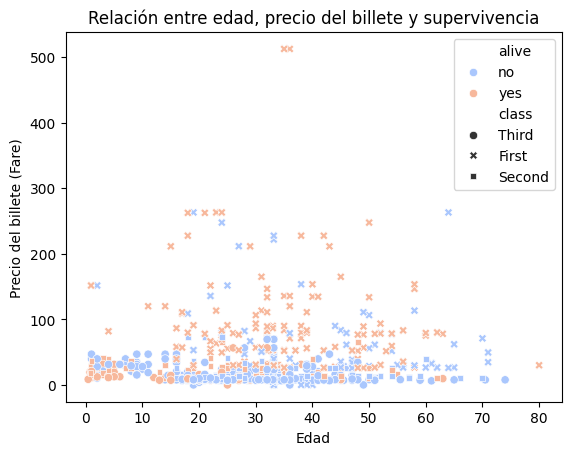

In [18]:
# Gráfico de dispersión entre precio del billete, edad y supervivencia
sns.scatterplot(data=titanic_df, x='age', y='fare', hue='alive', style='class', palette='coolwarm')
plt.title("Relación entre edad, precio del billete y supervivencia")
plt.xlabel("Edad")
plt.ylabel("Precio del billete (Fare)")
plt.show()


## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [32]:
# Cargar el dataset
df = pd.read_csv("./data/dataset_viajes_jun23.csv")
# Mostrar las columnas disponibles en el DataFrame
print("Columnas disponibles:")
print(df.columns)


Columnas disponibles:
Index(['aircompany', 'origen', 'destino', 'distancia', 'avion', 'con_escala',
       'consumo_kg', 'duracion', 'ingresos', 'id_vuelo', 'mes'],
      dtype='object')


In [33]:
# Contar los viajes por compañía aérea
trips_by_aircompany = df['aircompany'].value_counts()

# Mostrar los viajes por cada compañía aérea
print("\nViajes por compañía aérea:")
print(trips_by_aircompany)





Viajes por compañía aérea:
aircompany
TabarAir      142
MoldaviAir    133
PamPangea     117
FlyQ          108
Airnar        100
Name: count, dtype: int64


In [34]:
# Calcular el promedio de ingresos para cada compañía aérea
income_by_aircompany = df.groupby('aircompany')['ingresos'].mean()

# Mostrar los ingresos promedio
print("\nIngresos promedio por compañía aérea:")
print(income_by_aircompany)




Ingresos promedio por compañía aérea:
aircompany
Airnar        405293.978200
FlyQ          401619.008056
MoldaviAir    548077.209098
PamPangea     478417.048718
TabarAir      271042.230282
Name: ingresos, dtype: float64


C:\Users\javie\AppData\Local\Temp\ipykernel_11316\427456968.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income_by_aircompany.index, y=income_by_aircompany.values, palette='pastel')


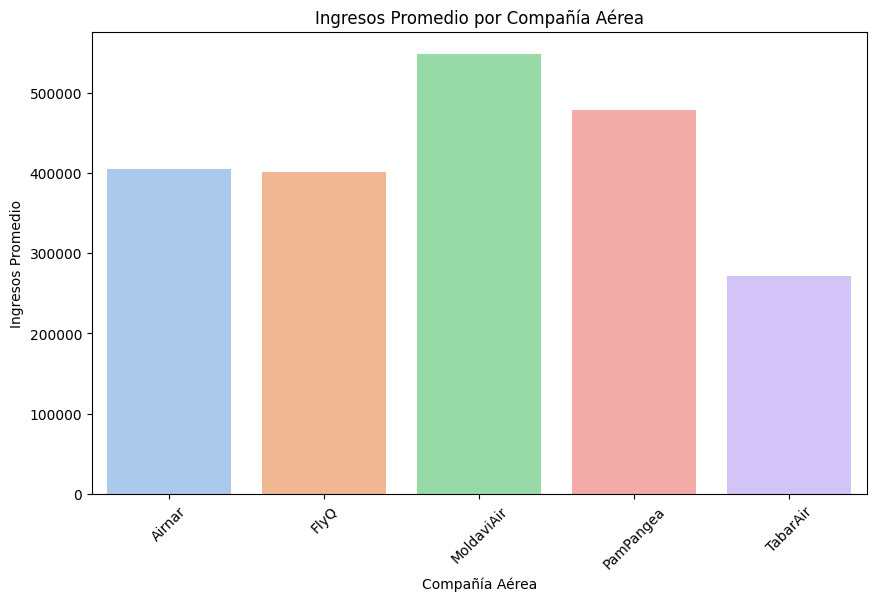

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de barras para visualizar los ingresos promedio por compañía aérea
plt.figure(figsize=(10, 6))
sns.barplot(x=income_by_aircompany.index, y=income_by_aircompany.values, palette='pastel')
plt.title("Ingresos Promedio por Compañía Aérea")
plt.xlabel("Compañía Aérea")
plt.ylabel("Ingresos Promedio")
plt.xticks(rotation=45)
plt.show()


En el análisis de los ingresos promedio por compañía aérea, observamos algo muy llamativo: MoldaviAir lidera con los ingresos promedio más altos, superando significativamente a las demás aerolíneas. Por otro lado, TabarAir, que es nuestra aerolínea como equipo de DataScience, tiene los ingresos promedio más bajos.

Esto podría significar:
Estrategia de precios: MoldaviAir podría estar enfocándose en rutas premium o clientes dispuestos a pagar más por los servicios. TabarAir, en cambio, podría estar compitiendo en rutas más económicas o con tarifas agresivas.

Tipos de rutas: Es posible que MoldaviAir opere rutas más largas o exclusivas con mayor margen de beneficio, mientras que TabarAir maneja rutas más cortas o con menos demanda.

Volumen de pasajeros: TabarAir podría priorizar el volumen de viajes, con tarifas más bajas, en lugar de ingresos por cliente.

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

In [36]:
# Calcular la matriz de correlación entre "ingresos", "distancia" y "consumo_kg"
correlation_matrix = df[['ingresos', 'distancia', 'consumo_kg']].corr()

# Mostrar la matriz de correlación
print("\nMatriz de correlación entre ingresos, distancia y consumo_kg:")
print(correlation_matrix)



Matriz de correlación entre ingresos, distancia y consumo_kg:
            ingresos  distancia  consumo_kg
ingresos    1.000000   0.928833    0.944875
distancia   0.928833   1.000000    0.762341
consumo_kg  0.944875   0.762341    1.000000


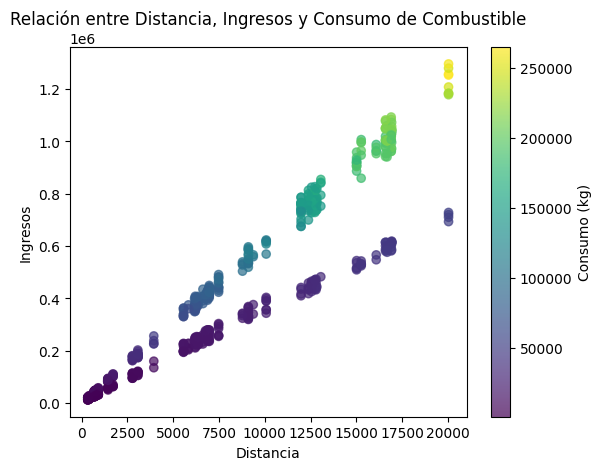

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el scatterplot con mapeo de color para "consumo_kg"
scatter = plt.scatter(df['distancia'], df['ingresos'], c=df['consumo_kg'], cmap='viridis', alpha=0.7)
plt.title("Relación entre Distancia, Ingresos y Consumo de Combustible")
plt.xlabel("Distancia")
plt.ylabel("Ingresos")

# Añadir la barra de color correspondiente
cbar = plt.colorbar(scatter)
cbar.set_label("Consumo (kg)")

# Mostrar el gráfico
plt.show()


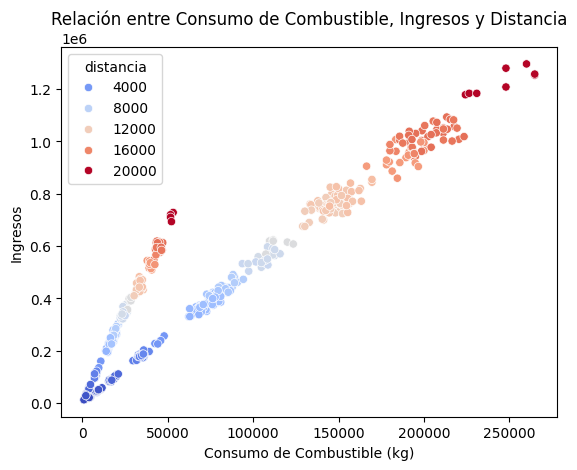

In [40]:
# Scatterplot de ingresos vs consumo_kg
sns.scatterplot(data=df, x='consumo_kg', y='ingresos', hue='distancia', palette='coolwarm')
plt.title("Relación entre Consumo de Combustible, Ingresos y Distancia")
plt.xlabel("Consumo de Combustible (kg)")
plt.ylabel("Ingresos")
plt.show()


In [41]:
import statsmodels.api as sm

# Definir variables independientes (X) y dependiente (Y)
X = df[['distancia', 'consumo_kg']]
y = df['ingresos']

# Añadir una constante para la regresión
X = sm.add_constant(X)

# Ajustar el modelo de regresión
model = sm.OLS(y, X).fit()

# Mostrar el resumen del modelo
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               ingresos   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 8.743e+04
Date:                Tue, 18 Mar 2025   Prob (F-statistic):               0.00
Time:                        01:48:21   Log-Likelihood:                -6748.3
No. Observations:                 600   AIC:                         1.350e+04
Df Residuals:                     597   BIC:                         1.352e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6272.4358   1345.480      4.662      0.0

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

count      600.000000
mean      8071.003333
std       5550.244086
min        344.000000
25%       3073.000000
50%       6877.000000
75%      12553.000000
max      20029.000000
Name: distancia, dtype: float64


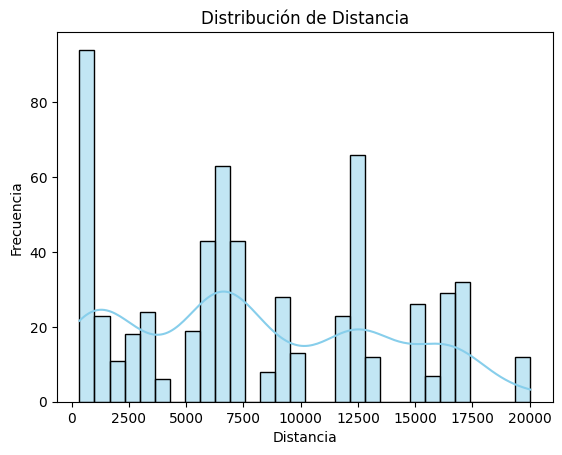

In [42]:
# Resumen estadístico de la columna distancia
print(df['distancia'].describe())

# Visualizar la distribución de distancias
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['distancia'], kde=True, bins=30, color='skyblue')
plt.title("Distribución de Distancia")
plt.xlabel("Distancia")
plt.ylabel("Frecuencia")
plt.show()


In [43]:
# Definir los rangos de las categorías basados en los valores observados
df['cat_vuelo'] = pd.cut(df['distancia'], 
                         bins=[0, 1000, 2500, 4000, df['distancia'].max()], 
                         labels=['Corto', 'Medio', 'Largo', 'Extra Largo'])

# Verificar la nueva columna
print("\nDistribución de la categoría cat_vuelo:")
print(df['cat_vuelo'].value_counts())



Distribución de la categoría cat_vuelo:
cat_vuelo
Extra Largo    424
Corto           94
Largo           48
Medio           34
Name: count, dtype: int64


In [44]:
# Resumen descriptivo
summary_by_cat = df.groupby('cat_vuelo')[['ingresos', 'consumo_kg']].mean()
print("\nPromedio de ingresos y consumo por categoría de vuelo:")
print(summary_by_cat)



Promedio de ingresos y consumo por categoría de vuelo:
                  ingresos    consumo_kg
cat_vuelo                               
Corto         30884.060319   4389.192281
Medio         78931.616765  12067.475350
Largo        155181.185000  23607.465285
Extra Largo  561853.390047  91953.480507


C:\Users\javie\AppData\Local\Temp\ipykernel_11316\121523586.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_by_cat = df.groupby('cat_vuelo')[['ingresos', 'consumo_kg']].mean()


C:\Users\javie\AppData\Local\Temp\ipykernel_11316\3799193571.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='cat_vuelo', y='ingresos', palette='pastel')


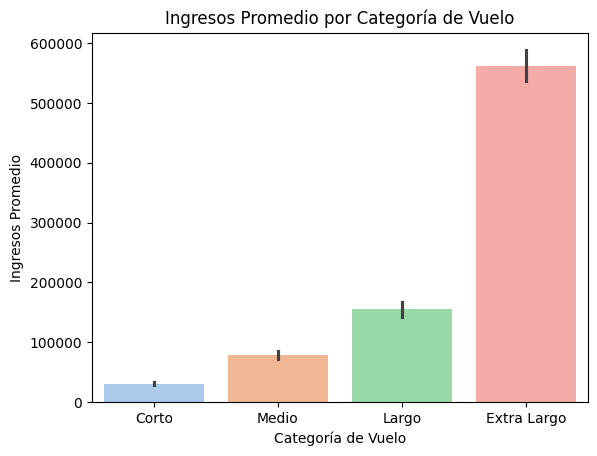

In [45]:
sns.barplot(data=df, x='cat_vuelo', y='ingresos', palette='pastel')
plt.title("Ingresos Promedio por Categoría de Vuelo")
plt.xlabel("Categoría de Vuelo")
plt.ylabel("Ingresos Promedio")
plt.show()


C:\Users\javie\AppData\Local\Temp\ipykernel_11316\1619429681.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='cat_vuelo', y='consumo_kg', palette='coolwarm')


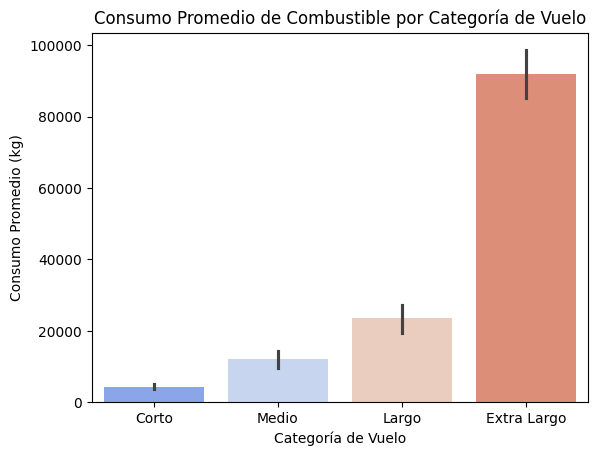

In [46]:
sns.barplot(data=df, x='cat_vuelo', y='consumo_kg', palette='coolwarm')
plt.title("Consumo Promedio de Combustible por Categoría de Vuelo")
plt.xlabel("Categoría de Vuelo")
plt.ylabel("Consumo Promedio (kg)")
plt.show()


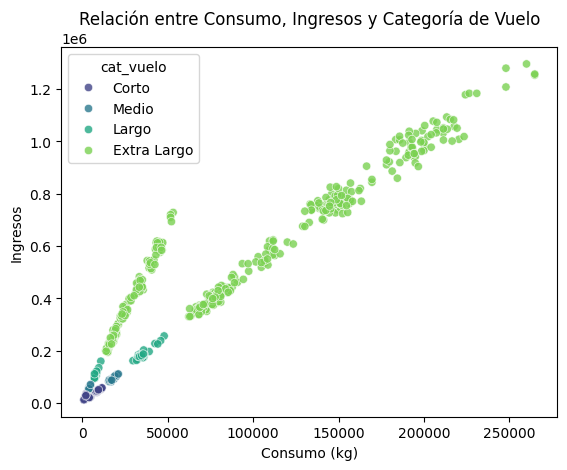

In [47]:
sns.scatterplot(data=df, x='consumo_kg', y='ingresos', hue='cat_vuelo', palette='viridis', alpha=0.8)
plt.title("Relación entre Consumo, Ingresos y Categoría de Vuelo")
plt.xlabel("Consumo (kg)")
plt.ylabel("Ingresos")
plt.show()


### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.

In [48]:
# Crear las variables de eficiencia
df['ingreso_por_kg'] = df['ingresos'] / df['consumo_kg']
df['kg_por_km'] = df['consumo_kg'] / df['distancia']

# Mostrar un vistazo a las nuevas columnas
print(df[['ingreso_por_kg', 'kg_por_km']].head())


   ingreso_por_kg  kg_por_km
0       13.835678   2.502900
1       13.994604   2.628288
2        5.343473  12.022400
3       13.704256   2.673000
4        5.092391  11.512800



Resumen estadístico de ingreso por kg:
count    600.000000
mean       8.904848
std        4.407691
min        4.554666
25%        5.131672
50%        5.459427
75%       13.855693
max       16.213469
Name: ingreso_por_kg, dtype: float64

Resumen estadístico de kg consumido por km:
count    600.000000
mean       7.934756
std        4.537013
min        2.430000
25%        2.660600
50%       11.086400
75%       11.906800
max       13.224640
Name: kg_por_km, dtype: float64


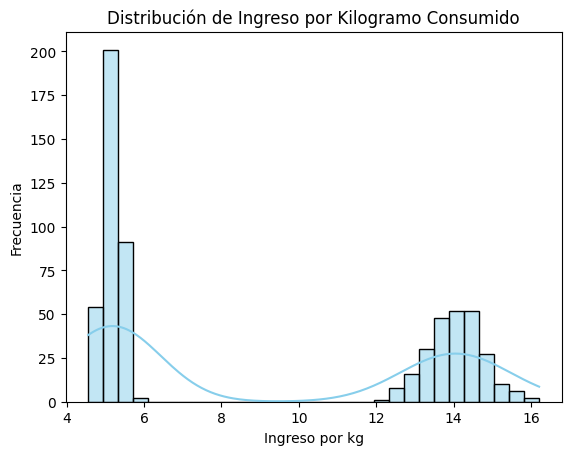

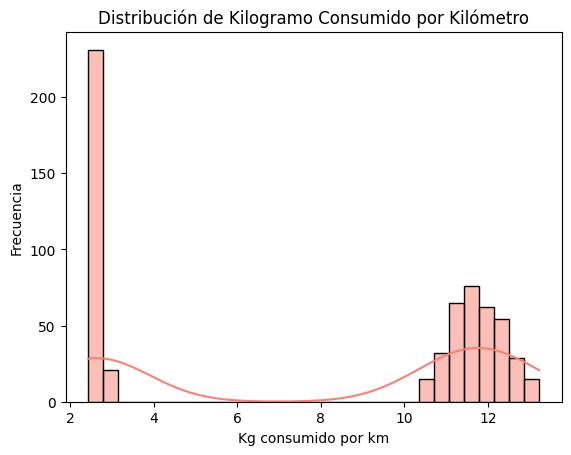

In [49]:
# Resumen estadístico
print("\nResumen estadístico de ingreso por kg:")
print(df['ingreso_por_kg'].describe())

print("\nResumen estadístico de kg consumido por km:")
print(df['kg_por_km'].describe())

# Histogramas para visualizar la distribución
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['ingreso_por_kg'], kde=True, color='skyblue', bins=30)
plt.title("Distribución de Ingreso por Kilogramo Consumido")
plt.xlabel("Ingreso por kg")
plt.ylabel("Frecuencia")
plt.show()

sns.histplot(df['kg_por_km'], kde=True, color='salmon', bins=30)
plt.title("Distribución de Kilogramo Consumido por Kilómetro")
plt.xlabel("Kg consumido por km")
plt.ylabel("Frecuencia")
plt.show()


In [50]:
# Crear variable binaria para eficiencia
umbral_ingreso_por_kg = df['ingreso_por_kg'].median()
umbral_kg_por_km = df['kg_por_km'].median()

df['es_supereficiente'] = (df['ingreso_por_kg'] > umbral_ingreso_por_kg) & (df['kg_por_km'] < umbral_kg_por_km)

# Verificar los valores únicos
print("\nDistribución de la variable es_supereficiente:")
print(df['es_supereficiente'].value_counts())



Distribución de la variable es_supereficiente:
es_supereficiente
False    324
True     276
Name: count, dtype: int64



Proporción de vuelos supereficientes por compañía:
aircompany
Airnar        0.400000
FlyQ          0.453704
MoldaviAir    0.428571
PamPangea     0.504274
TabarAir      0.500000
Name: es_supereficiente, dtype: float64


C:\Users\javie\AppData\Local\Temp\ipykernel_11316\1513840588.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=efficiency_by_aircompany.index, y=efficiency_by_aircompany.values, palette='coolwarm')


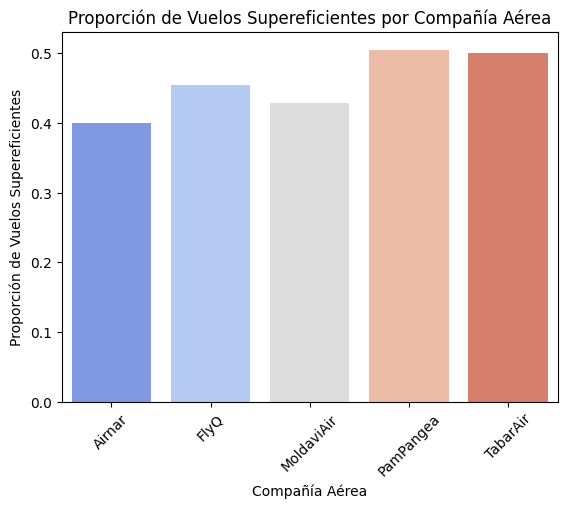

In [51]:
# Proporción de vuelos supereficientes por compañía
efficiency_by_aircompany = df.groupby('aircompany')['es_supereficiente'].mean()

# Mostrar los resultados
print("\nProporción de vuelos supereficientes por compañía:")
print(efficiency_by_aircompany)

# Visualizar el análisis
sns.barplot(x=efficiency_by_aircompany.index, y=efficiency_by_aircompany.values, palette='coolwarm')
plt.title("Proporción de Vuelos Supereficientes por Compañía Aérea")
plt.xlabel("Compañía Aérea")
plt.ylabel("Proporción de Vuelos Supereficientes")
plt.xticks(rotation=45)
plt.show()


In [52]:
# Agrupar por compañía y tipo de avión para analizar eficiencia
efficiency_by_plane = df.groupby(['aircompany', 'avion'])['es_supereficiente'].mean()

# Mostrar el resultado
print("\nEficiencia por compañía y tipo de avión:")
print(efficiency_by_plane)



Eficiencia por compañía y tipo de avión:
aircompany  avion      
Airnar      Airbus A320    1.000000
            Airbus A380    0.000000
            Boeing 737     1.000000
            Boeing 747     0.184211
FlyQ        Airbus A320    1.000000
            Airbus A380    0.000000
            Boeing 737     1.000000
            Boeing 747     0.081081
MoldaviAir  Airbus A320    1.000000
            Airbus A380    0.000000
            Boeing 737     1.000000
            Boeing 747     0.125000
PamPangea   Airbus A320    1.000000
            Airbus A380    0.000000
            Boeing 737     1.000000
            Boeing 747     0.074074
TabarAir    Airbus A320    1.000000
            Airbus A380    0.000000
            Boeing 737     1.000000
            Boeing 747     0.170732
Name: es_supereficiente, dtype: float64


Los resultados muestran que los aviones Airbus A320 y Boeing 737 son consistentemente supereficientes (100%) para todas las compañías, mientras que el Airbus A380 es siempre ineficiente (0%). Los Boeing 747 tienen una eficiencia variable y baja, con TabarAir siendo más eficiente que algunas competidoras pero aún limitada en comparación con líderes como Airnar.